# Fit spline

In [1]:
# Standard imports
import numpy as np
import cv2
from matplotlib import pyplot as plt
from typing import *

In [2]:
# spline_interpolations.py provides some spline interpolation methods
# (see its code)
from spline_interpolations import *

In [3]:
# Define some types synomyms for clarity
Point2D = np.ndarray # shape = (1, 2)
PointsArray = np.ndarray # Liste de points, shape = [n, 2]

# Utilitaires
On définit des fonctions de dessin de splines interpolees avec leur point de controle:

In [4]:
def _plot_pixels_array(ax, points: PointsArray, style):
    """
    This will plot a PointsArray (private function)
    """
    x = points[:,0]
    y = points[:,1] * -1
    ax.plot(x, y, style) 

    
def plot_control_and_interpolate(control_points: PointsArray, interpolated_points: PointsArray, title:str = ""):
    """
    This will plot some control points and their interpolate + a title
    """
    fig, ax = plt.subplots(1, 1) 
    _plot_pixels_array(ax, control_points, 'or')
    _plot_pixels_array(ax, interpolated_points, '-b')
    fig.suptitle(title)

def plot_curve(curve: PointsArray, title:str = ""):
    """
    This will plot a curve + a title
    """
    fig, ax = plt.subplots(1, 1) 
    _plot_pixels_array(ax, curve, '-b')
    fig.suptitle(title)    

# Fonctions d'interpolation de splines
On dispose de deux fonctions d'interpolation, `interpolate_centripetal_catmull_rom_circular_shape` et `interpolate_pascal_spline_circular_shape` qui permettent d'interpoler des points de controle vers une form circulaire "douce".
Elles sont définies dans spline_interpolations.py

Par exemple, étant donné les points:

In [5]:
control_points = np.array(
        [
            [0., 0.],
            [1., 0.],
            [1., 1.],
            [0., 1.],
        ]
    )

On peut avoir les interpolées ci-dessous:

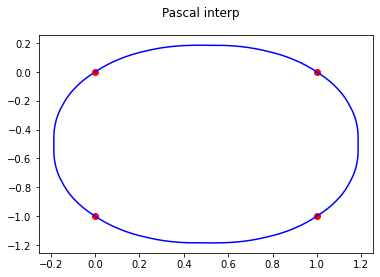

In [6]:
nb_points_to_interpolate = 200
alpha = 0.4
interpolated_points = interpolate_pascal_spline_circular_shape(control_points, nb_points_to_interpolate, alpha)
plot_control_and_interpolate(control_points, interpolated_points, "Pascal interp")

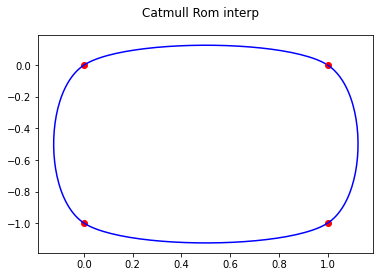

In [7]:
nb_points_to_interpolate = 200
alpha = 0.4
interpolated_points = interpolate_centripetal_catmull_rom_circular_shape(control_points, nb_points_to_interpolate, alpha)
plot_control_and_interpolate(control_points, interpolated_points, "Catmull Rom interp")

# Collection de formes

On dispose de plusieurs formes typiques:


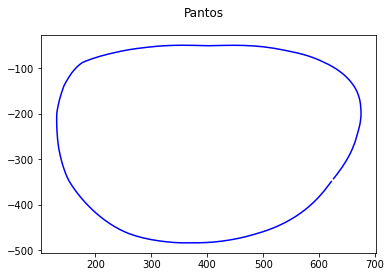

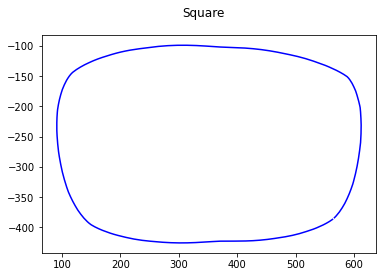

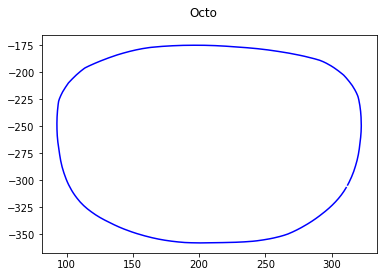

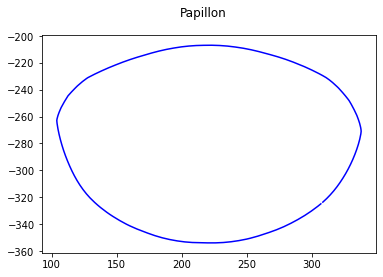

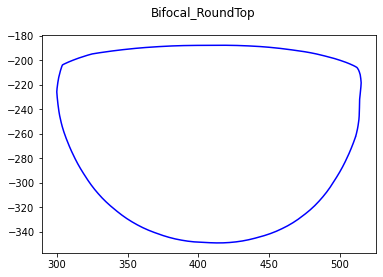

In [8]:
for shape_name, curve in typical_shapes().items():
    plot_curve(curve, shape_name)

# Le problème: fitspline

On cherche les fonctions inverses (appelée `fit_spline_*`) qui permettent, étant donnée une courbe avec beaucoup de points (les courbes en bleu ci-dessus) de trouver un bon ensemble de points de contrôle permettant d'approximer la courbe avec une de ces deux méthodes d'interpolation.

Leur signature doit être:

In [9]:
def fit_spline_pascal(
    curve: PointsArray,
    nbControlPoints: int,
    alpha: float
  ) -> PointsArray:

    """ 
    fit_spline_pascal renvoie nb_control_points permettant d'approximer la courbe 
    avec l'interpolation interpolate_pascal_spline_circular_shape
    """
    pass


def fit_spline_catmull_rom(
     curve: PointsArray,
    nbControlPoints: int,
    alpha: float
  ) -> PointsArray:
    """idem avec interpolate_centripetal_catmull_rom_circular_shape"""

    

On essaiera d'abord d'implémenter fit_spline_catmull_rom, puis on pourra généraliser à plusieurs types d'interpolation.

Par exemple, on pourra essayer d'approximer la forme ci-dessous:

In [10]:
my_shape = typical_shapes()["Pantos"]

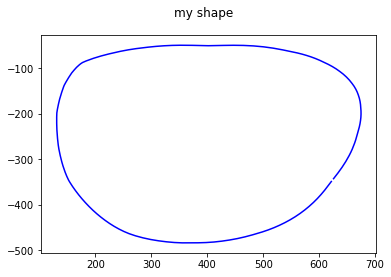

In [11]:
plot_curve(my_shape, "my shape")

In [13]:
# Ci dessous le contenu de my_shape
print(my_shape.shape)
print(my_shape)

(256, 2)
[[622.         349.        ]
 [619.05060858 353.8211296 ]
 [616.10941723 358.64732134]
 [613.12057815 363.44350869]
 [610.06934849 368.20002836]
 [606.92984557 372.89600594]
 [603.70096108 377.53091007]
 [600.38672727 382.1044296 ]
 [596.97238501 386.60356202]
 [593.45628267 391.01915319]
 [589.83436415 395.34834873]
 [586.11227094 399.59148902]
 [582.28962068 403.74431326]
 [578.38110771 407.81415307]
 [574.37297636 411.78578933]
 [570.26595223 415.65479036]
 [566.05895499 419.41483402]
 [561.75242306 423.07809933]
 [557.35000991 426.62551425]
 [552.85725078 430.05783421]
 [548.2760817  433.37133125]
 [543.61904912 436.57775859]
 [538.88101475 439.66318653]
 [534.06653365 442.62816031]
 [529.1796514  445.47238994]
 [524.23554962 448.21096302]
 [519.22614163 450.82806325]
 [514.15537097 453.3244755 ]
 [509.02390188 455.69363915]
 [503.83658094 457.93912449]
 [498.59869956 460.06429631]
 [493.31544451 462.0751516 ]
 [488.         464.        ]
 [481.29916583 466.40509364]
 [474